<a href="https://colab.research.google.com/github/sparshdubey95/MLmodels/blob/main/Covid_19_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the zip file in your Google Drive+
zip_path = '/content/drive/MyDrive/archive.zip'

# Extract the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')  # Extract to a new directory in Colab

Mounted at /content/drive


Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


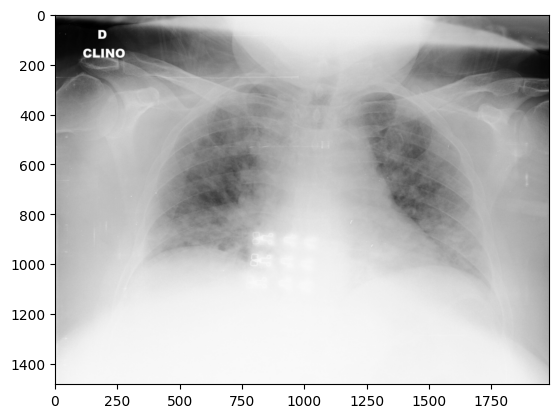

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


161/161 ━━━━━━━━━━━━━━━━━━━━ 150s 898ms/step - accuracy: 0.7165 - loss: 0.7067 - val_accuracy: 0.9224 - val_loss: 0.2251
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 141s 857ms/step - accuracy: 0.8652 - loss: 0.3418 - val_accuracy: 0.9138 - val_loss: 0.2298
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 145s 883ms/step - accuracy: 0.8833 - loss: 0.2897 - val_accuracy: 0.9161 - val_loss: 0.2119
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 200s 863ms/step - accuracy: 0.8812 - loss: 0.3107 - val_accuracy: 0.9076 - val_loss: 0.2429
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 200s 852ms/step - accuracy: 0.8957 - loss: 0.2546 - val_accuracy: 0.9394 - val_loss: 0.1809
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 149s 905ms/step - accuracy: 0.9153 - loss: 0.2365 - val_accuracy: 0.9309 - val_loss: 0.1984
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 192s 847ms/step - accuracy: 0.9183 - loss: 0.2459 - val_accuracy: 0.9208 - val_loss: 0.2163
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 140s 823ms/step - accuracy: 0.9103 - loss: 0.22

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,525,387 (9.63 MB)

 Trainable params: 841,795 (3.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,683,592 (6.42 MB)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define paths to train and test directories
train_dir = '/content/dataset/Data/train'
test_dir = '/content/dataset/Data/test'

# Image data augmentation for training data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_data_generator = ImageDataGenerator(rescale=1./255)

# Loading the training and testing sets
training_set = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)
testing_set = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

# Display a sample image
sample_image_path = os.path.join(train_dir, 'COVID19', 'COVID19(1).jpg')
plt.imshow(Image.open(sample_image_path))
plt.show()

# Build the CNN model
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())  # Flattening the 3D output to 1D
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))  # Use softmax for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    x=training_set,
    validation_data=testing_set,
    epochs=10,
    callbacks=[early_stopping]
)

# Display model summary
model.summary()

In [ ]:
import zipfile
import os

# Define the path to the zip file in your Google Drive
zip_path = '/content/drive/MyDrive/archive3.zip'  # Replace with your actual path

# Extract the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')  # Extract to a new directory in Colab